In [1]:
from unidec_modules.ChromEng2 import *
import plate_map2 as pm2
from dataclasses import dataclass
import pandas as pd
import UniChromExtra as uc
import matplotlib.pyplot as plt

In [2]:
spectra_path = "C:\\Users\\cm19ljc\\Documents\\GitHub\\UniDec\\mzML\\mzML.mzML"
map_path = "unichrom plate map example.xlsx"

In [16]:
eng = ChromEngine()
eng.load_mzml(spectra_path)
eng.config.chrom_peak_width = 0.05
eng.get_chrom_peaks(min = 1) # INSERT PLOT HERE


UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe
Opening HDF5 File: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\mzML.hdf5
Reading mzML: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\mzML.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\mzML.mzML.gz
Error getting TIC in mzML; trying to make it...
Imported Data. Constructing TIC
Done
1070 2
Noise Level: 0.03357343719702872 Window: 0.05
Bad Peak [0.419567   0.30422294] 0.23768299999999998 [0.419567, 0.65725]
Bad Peak [0.602767   0.24142904] 0.24183299999999996 [0.419567, 0.6614]
0.702967 0.14128400000000008
0.790233 0.16205000000000003
1.0312 0.13711000000000007
1.95747 0.1411800000000003
2.88835 0.13712999999999997
Bad Peak [3.76958    0.03455761] 0.8769500000000003 [3.7197, 4.59665

([array([0.702967  , 0.13838679]),
  array([0.790233  , 0.09750636]),
  array([1.0312    , 0.74873995]),
  array([1.95747   , 0.88543616]),
  array([2.88835, 1.     ])],
 array([[0.686333, 0.827617],
        [0.682183, 0.844233],
        [1.00212 , 1.13923 ],
        [1.9284  , 2.06958 ],
        [2.85927 , 2.9964  ]]))

Getting scans: [98, 131]
Length merge axis: 28915
Getting scans: [321, 355]
Length merge axis: 30293
Getting scans: [545, 578]
Length merge axis: 31336


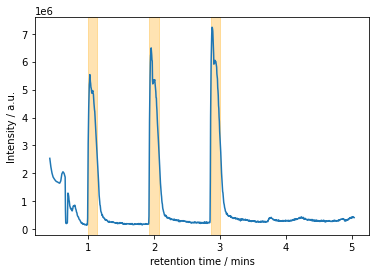

In [4]:
# eng.config.sw_scan_offset = 0 # ??? defaults to 10

eng.add_chrom_peaks2() # stores data from selected peaks ready for metaunidec processing
uc.plot_tic(eng, peak_windows = True)

In [5]:
eng = uc.update_config(eng)

In [6]:
eng.process_data()
eng.run_unidec()
eng.pick_peaks() 
eng = uc.integrate_all(eng)

Execution Time: 0.0729564000000007
Execution Time: 2.5757467
Execution Time: 0.18597999999999892
Peak info saved to: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\UniDec_Figures_and_Files\mzML_extracts.txt


In [7]:
# PLATE MAP PROCESSING STARTS HERE
rmap, pmap = pm2.read_in_long(map_path)
eng = pm2.update_vars(eng, pmap, skip_empty = True)

In [8]:
eng = uc.integrate_all(eng)


In [9]:
reactions = uc.process(rmap, pmap, eng = eng)
reactions = uc.match_peaks(eng, reactions)

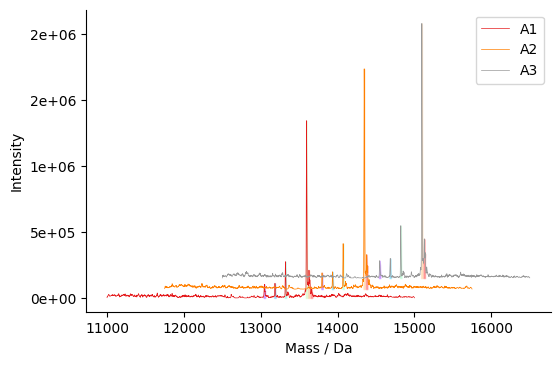

In [10]:
uc.plot_all(eng, combine = True)

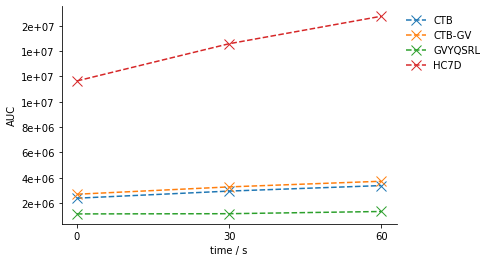

In [11]:
for rkey, rval in reactions.items():
    
    data, time = uc.get_data_from_dct(rval)
    uc.plot_data(data, time, linestyle = '--', markersize = 10)